In [1]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:

df = pd.read_csv('dataset/Gungor_2018_VictorianAuthorAttribution_data-train.csv', encoding = "ISO-8859-1")
df['author'] = df['author'] -1

In [3]:
df.head()

,text,author
0,ou have time to listen i will give you the ent...,0
1,wish for solitude he was twenty years of age a...,0
2,and the skirt blew in perfect freedom about th...,0
3,of san and the rows of shops opposite impresse...,0
4,an hour s walk was as tiresome as three in a s...,0


In [4]:
import re
df['text']= df['text'].apply(lambda x: x.lower())
df['text']= df['text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]','',x))


In [5]:
df.head()

,text,author
0,ou have time to listen i will give you the ent...,0
1,wish for solitude he was twenty years of age a...,0
2,and the skirt blew in perfect freedom about th...,0
3,of san and the rows of shops opposite impresse...,0
4,an hour s walk was as tiresome as three in a s...,0


In [6]:
X = df['text']
Y = df['author']


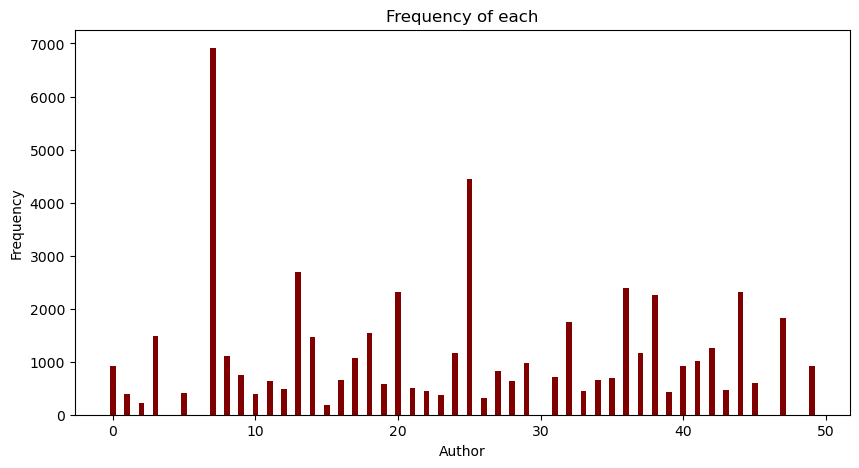

In [52]:
import matplotlib.pyplot as plt

data = dict(df['author'].value_counts())
courses = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("Author")
plt.ylabel("Frequency")
plt.title("Frequency of each")
plt.show()

In [7]:
MAX_FEATURES = 9807

In [8]:
from nltk.corpus import stopwords
vectorizer = TfidfVectorizer(analyzer='word',stop_words=stopwords.words('english'),max_features=MAX_FEATURES)
X = vectorizer.fit_transform(X).toarray()
Y= Y.to_numpy()

In [9]:
print(f"Shape of X: {X.shape}")

Shape of X: (53678, 9807)


In [10]:
features = vectorizer.get_feature_names_out()
df_post_processing = pd.DataFrame(X,columns=features).head()
df_post_processing.head()

,aa,aad,ab,abandon,abandoned,abashed,abbey,abide,abiding,abilities,...,young,younger,youngest,youth,youthful,youths,youve,zeal,zealous,zest
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.061786,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.079130,0.0,0.0,0.036152,0.0,0.065186,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.087735,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.021153,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.019981,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [12]:
X = np.array(X,dtype=np.float32)
Y = np.array(Y,dtype=np.float32).reshape(-1,1)
X.shape , Y.shape

((53678, 9807), (53678, 1))

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
Y = le.fit_transform(Y)
set(Y)

{0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44}

### Splitting Dataset into traing,val,test

In [14]:
import numpy as np  

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=1 - train_ratio,)

x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 


x_train =x_train.reshape(-1,MAX_FEATURES,1)

print(x_train.shape, x_val.shape, x_test.shape)
print(y_train.shape, y_val.shape, y_test.shape)

(40258, 9807, 1) (8052, 9807) (5368, 9807)
(40258,) (8052,) (5368,)


In [15]:
BATCH_SIZE = 32
NUM_CLASSES = 45


In [16]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
torch.manual_seed(0)
import tqdm
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [17]:
train_dl = torch.utils.data.DataLoader(dataset= list(zip(x_train,y_train)), shuffle=True, batch_size=BATCH_SIZE)
val_dl = torch.utils.data.DataLoader(dataset= list(zip(x_val,y_val)), shuffle=True, batch_size=BATCH_SIZE)
test_dl = torch.utils.data.DataLoader(dataset= list(zip(x_test,y_test)), shuffle=True, batch_size=BATCH_SIZE)

### Defining Model

In [22]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.dropout = nn.Dropout(0.5)
        self.fc1 = nn.Linear(MAX_FEATURES,1024)
        self.fc2 = nn.Linear(1024,64)
        self.fc3 = nn.Linear(64,NUM_CLASSES)

    def forward(self,x):
        x = torch.relu(self.fc1(x))
        x = self.dropout(x)
        x = torch.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

def train_model(optim = 'Adam', lr = 0.0001, num_epochs=20):
    model = Net().to(device)
    criterion = nn.CrossEntropyLoss()
    if optim == 'SGD':
        optim = torch.optim.SGD(model.parameters(),lr=lr,momentum=0.9,nesterov=True)
    else:
        optim = torch.optim.Adam(model.parameters(),lr=lr,weight_decay=1e-5)
    

    epochs= tqdm.tqdm(range(num_epochs))
    n_total_steps = len(train_dl)

    trainingEpoch_loss = []
    validationEpoch_loss = []
    train_acc_history = []
    val_acc_history = []

    for epoch in epochs:
        train_loss = []
        model.train()

        n_correct = 0
        n_samples = 0
        for i,batch in enumerate(train_dl):
            
            input = batch[0].reshape(-1, MAX_FEATURES).to(device)
            label= batch[1].to(device)
            # Forward-pass
            output = model(input)
            loss = criterion(output,label)
            
            # Backward-pass and optimize
            optim.zero_grad()
            loss.backward()
            optim.step()
            train_loss.append(loss.item())

            _, pred = torch.max(output,1)
            n_samples += label.shape[0]
            n_correct += (pred == label).sum().item()

        train_acc= 100.0 * n_correct / n_samples
        train_acc_history.append(train_acc)
        loss_now = np.mean(train_loss)
        trainingEpoch_loss.append(loss_now)
        model.eval()     # Optional when not using Model Specific layer

        n_correct = 0
        n_samples = 0
        for i, batch in enumerate(val_dl):
            validationStep_loss = []
            input = batch[0].reshape(-1, MAX_FEATURES).to(device)    
            label= batch[1].to(device)
            # Forward Pass
            outputs = model(input)
            # Find the Loss
            validation_loss = criterion(outputs, label)
            # Calculate Loss
            validationStep_loss.append(validation_loss.item())

            _, pred = torch.max(outputs,1)
            n_samples += label.shape[0]
            n_correct += (pred == label).sum().item()

        val_acc= 100.0 * n_correct / n_samples
        val_acc_history.append(val_acc)
        validationEpoch_loss.append(np.array(validationStep_loss).mean())
        epochs.set_postfix({"loss": loss.item(), "val_loss": validation_loss.item(),"train_acc": train_acc,"val_acc": val_acc})
        print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/ {n_total_steps}, loss = {loss.item():.4f}, val_loss = {validation_loss.item():.4f}')
    return trainingEpoch_loss, train_acc_history, validationEpoch_loss, val_acc_history


### Training Models

In [23]:
print('Training with Adam Optimizer')
adam_model, adam_training_losses,adam_training_acc,adam_val_losses,adam_val_acc= train_model('Adam',0.0001,20)
print('Training with SGD Optimizer')
SGD_model, SGD_training_losses,SGD_training_acc,SGD_val_losses,SGD_val_acc= train_model('SGD',0.001,60)

Training with Adam Optimizer


  5%|▌         | 1/20 [00:10<03:20, 10.56s/it, loss=2.18, val_loss=2.59, train_acc=29.3, val_acc=53.7]

epoch 1 / 20, step 252/ 1259, loss = 2.1782, val_loss = 2.5860


 10%|█         | 2/20 [00:21<03:11, 10.64s/it, loss=4.18, val_loss=1.31, train_acc=57.1, val_acc=75.1]

epoch 2 / 20, step 252/ 1259, loss = 4.1786, val_loss = 1.3119


 15%|█▌        | 3/20 [00:31<03:01, 10.66s/it, loss=0.948, val_loss=0.737, train_acc=71.4, val_acc=84.4]

epoch 3 / 20, step 252/ 1259, loss = 0.9477, val_loss = 0.7372


 20%|██        | 4/20 [00:42<02:50, 10.68s/it, loss=1.38, val_loss=0.442, train_acc=79.6, val_acc=88.2] 

epoch 4 / 20, step 252/ 1259, loss = 1.3792, val_loss = 0.4420


 25%|██▌       | 5/20 [00:53<02:39, 10.66s/it, loss=0.739, val_loss=0.211, train_acc=84.6, val_acc=90.5]

epoch 5 / 20, step 252/ 1259, loss = 0.7392, val_loss = 0.2113


 30%|███       | 6/20 [01:03<02:29, 10.66s/it, loss=0.258, val_loss=0.163, train_acc=88.3, val_acc=92.3]

epoch 6 / 20, step 252/ 1259, loss = 0.2583, val_loss = 0.1627


 35%|███▌      | 7/20 [01:14<02:18, 10.68s/it, loss=1.52, val_loss=0.558, train_acc=90.4, val_acc=93.2] 

epoch 7 / 20, step 252/ 1259, loss = 1.5239, val_loss = 0.5578


 40%|████      | 8/20 [01:25<02:08, 10.68s/it, loss=0.000175, val_loss=0.473, train_acc=92.5, val_acc=93.7]

epoch 8 / 20, step 252/ 1259, loss = 0.0002, val_loss = 0.4731


 45%|████▌     | 9/20 [01:36<01:57, 10.68s/it, loss=0.158, val_loss=0.455, train_acc=93.9, val_acc=94.3]   

epoch 9 / 20, step 252/ 1259, loss = 0.1578, val_loss = 0.4554


 50%|█████     | 10/20 [01:46<01:46, 10.69s/it, loss=0.111, val_loss=0.121, train_acc=95.1, val_acc=94.7]

epoch 10 / 20, step 252/ 1259, loss = 0.1108, val_loss = 0.1207


 55%|█████▌    | 11/20 [01:57<01:35, 10.65s/it, loss=0.0203, val_loss=0.16, train_acc=95.8, val_acc=94.8]

epoch 11 / 20, step 252/ 1259, loss = 0.0203, val_loss = 0.1599


 60%|██████    | 12/20 [02:07<01:25, 10.66s/it, loss=0.0851, val_loss=0.0608, train_acc=96.6, val_acc=95]

epoch 12 / 20, step 252/ 1259, loss = 0.0851, val_loss = 0.0608


 65%|██████▌   | 13/20 [02:18<01:14, 10.66s/it, loss=0.125, val_loss=0.115, train_acc=97, val_acc=95.1]  

epoch 13 / 20, step 252/ 1259, loss = 0.1247, val_loss = 0.1154


 70%|███████   | 14/20 [02:29<01:03, 10.63s/it, loss=0.341, val_loss=0.0168, train_acc=97.5, val_acc=95.3]

epoch 14 / 20, step 252/ 1259, loss = 0.3408, val_loss = 0.0168


 75%|███████▌  | 15/20 [02:39<00:53, 10.63s/it, loss=0.285, val_loss=0.249, train_acc=97.7, val_acc=95.4] 

epoch 15 / 20, step 252/ 1259, loss = 0.2847, val_loss = 0.2488


 80%|████████  | 16/20 [02:50<00:42, 10.64s/it, loss=0.0182, val_loss=0.351, train_acc=98.1, val_acc=95.3]

epoch 16 / 20, step 252/ 1259, loss = 0.0182, val_loss = 0.3514


 85%|████████▌ | 17/20 [03:01<00:31, 10.64s/it, loss=0.00013, val_loss=0.4, train_acc=98.2, val_acc=95.6] 

epoch 17 / 20, step 252/ 1259, loss = 0.0001, val_loss = 0.4000


 90%|█████████ | 18/20 [03:11<00:21, 10.60s/it, loss=0.0133, val_loss=0.00227, train_acc=98.4, val_acc=95.4]

epoch 18 / 20, step 252/ 1259, loss = 0.0133, val_loss = 0.0023


 95%|█████████▌| 19/20 [03:22<00:10, 10.59s/it, loss=0.00339, val_loss=0.634, train_acc=98.6, val_acc=95.6] 

epoch 19 / 20, step 252/ 1259, loss = 0.0034, val_loss = 0.6339


100%|██████████| 20/20 [03:32<00:00, 10.64s/it, loss=0.126, val_loss=0.18, train_acc=98.7, val_acc=95.5]   


epoch 20 / 20, step 252/ 1259, loss = 0.1256, val_loss = 0.1803
Training with SGD Optimizer


  2%|▏         | 1/60 [00:07<07:16,  7.40s/it, loss=2.94, val_loss=3.64, train_acc=12.6, val_acc=13.3]

epoch 1 / 60, step 252/ 1259, loss = 2.9385, val_loss = 3.6355


  3%|▎         | 2/60 [00:14<07:08,  7.39s/it, loss=3.63, val_loss=3.43, train_acc=13, val_acc=13.3]  

epoch 2 / 60, step 252/ 1259, loss = 3.6287, val_loss = 3.4290


  5%|▌         | 3/60 [00:22<06:59,  7.36s/it, loss=3.37, val_loss=3.3, train_acc=14.5, val_acc=19.6]

epoch 3 / 60, step 252/ 1259, loss = 3.3711, val_loss = 3.3016


  7%|▋         | 4/60 [00:29<06:53,  7.39s/it, loss=2.62, val_loss=2.94, train_acc=18, val_acc=21.2] 

epoch 4 / 60, step 252/ 1259, loss = 2.6181, val_loss = 2.9416


  8%|▊         | 5/60 [00:36<06:46,  7.38s/it, loss=0.986, val_loss=3.27, train_acc=21.3, val_acc=26.6]

epoch 5 / 60, step 252/ 1259, loss = 0.9859, val_loss = 3.2693


 10%|█         | 6/60 [00:44<06:39,  7.39s/it, loss=0.999, val_loss=3.17, train_acc=25.6, val_acc=28.6]

epoch 6 / 60, step 252/ 1259, loss = 0.9994, val_loss = 3.1694


 12%|█▏        | 7/60 [00:51<06:32,  7.40s/it, loss=3.39, val_loss=2.73, train_acc=28.1, val_acc=31.3] 

epoch 7 / 60, step 252/ 1259, loss = 3.3917, val_loss = 2.7301


 13%|█▎        | 8/60 [00:59<06:24,  7.40s/it, loss=5.02, val_loss=2.8, train_acc=30.5, val_acc=33.8] 

epoch 8 / 60, step 252/ 1259, loss = 5.0241, val_loss = 2.7974


 15%|█▌        | 9/60 [01:06<06:19,  7.44s/it, loss=4.18, val_loss=2.86, train_acc=33.1, val_acc=37.1]

epoch 9 / 60, step 252/ 1259, loss = 4.1808, val_loss = 2.8604


 17%|█▋        | 10/60 [01:14<06:10,  7.41s/it, loss=1.91, val_loss=2.02, train_acc=35.4, val_acc=39.7]

epoch 10 / 60, step 252/ 1259, loss = 1.9106, val_loss = 2.0208


 18%|█▊        | 11/60 [01:21<06:02,  7.40s/it, loss=3.62, val_loss=2.27, train_acc=37.9, val_acc=42.4]

epoch 11 / 60, step 252/ 1259, loss = 3.6166, val_loss = 2.2657


 20%|██        | 12/60 [01:28<05:55,  7.40s/it, loss=0.139, val_loss=1.96, train_acc=40.4, val_acc=45.9]

epoch 12 / 60, step 252/ 1259, loss = 0.1388, val_loss = 1.9649


 22%|██▏       | 13/60 [01:36<05:47,  7.39s/it, loss=2.5, val_loss=1.69, train_acc=43.4, val_acc=49]    

epoch 13 / 60, step 252/ 1259, loss = 2.4960, val_loss = 1.6891


 23%|██▎       | 14/60 [01:43<05:40,  7.40s/it, loss=0.964, val_loss=1.33, train_acc=46.4, val_acc=53.9]

epoch 14 / 60, step 252/ 1259, loss = 0.9642, val_loss = 1.3261


 25%|██▌       | 15/60 [01:50<05:31,  7.37s/it, loss=3.13, val_loss=2.14, train_acc=49.5, val_acc=57.5] 

epoch 15 / 60, step 252/ 1259, loss = 3.1280, val_loss = 2.1430


 27%|██▋       | 16/60 [01:58<05:23,  7.36s/it, loss=1.24, val_loss=1.93, train_acc=52.6, val_acc=60.8]

epoch 16 / 60, step 252/ 1259, loss = 1.2433, val_loss = 1.9270


 28%|██▊       | 17/60 [02:05<05:16,  7.35s/it, loss=2.27, val_loss=1.37, train_acc=55.5, val_acc=63.9]

epoch 17 / 60, step 252/ 1259, loss = 2.2692, val_loss = 1.3657


 30%|███       | 18/60 [02:12<05:09,  7.36s/it, loss=1.41, val_loss=1.71, train_acc=58.1, val_acc=67]  

epoch 18 / 60, step 252/ 1259, loss = 1.4074, val_loss = 1.7128


 32%|███▏      | 19/60 [02:20<05:02,  7.37s/it, loss=0.266, val_loss=0.955, train_acc=61.1, val_acc=69.5]

epoch 19 / 60, step 252/ 1259, loss = 0.2665, val_loss = 0.9552


 33%|███▎      | 20/60 [02:27<04:55,  7.38s/it, loss=0.598, val_loss=1.53, train_acc=63, val_acc=71.4]   

epoch 20 / 60, step 252/ 1259, loss = 0.5980, val_loss = 1.5316


 35%|███▌      | 21/60 [02:35<04:48,  7.39s/it, loss=1.09, val_loss=1.16, train_acc=65.4, val_acc=72.9]

epoch 21 / 60, step 252/ 1259, loss = 1.0933, val_loss = 1.1559


 37%|███▋      | 22/60 [02:42<04:40,  7.39s/it, loss=1.01, val_loss=1.16, train_acc=67.5, val_acc=74.7]

epoch 22 / 60, step 252/ 1259, loss = 1.0116, val_loss = 1.1634


 38%|███▊      | 23/60 [02:49<04:32,  7.36s/it, loss=1.3, val_loss=0.929, train_acc=68.9, val_acc=76.3]

epoch 23 / 60, step 252/ 1259, loss = 1.2964, val_loss = 0.9295


 40%|████      | 24/60 [02:57<04:25,  7.38s/it, loss=0.0197, val_loss=1.03, train_acc=70.8, val_acc=77.1]

epoch 24 / 60, step 252/ 1259, loss = 0.0197, val_loss = 1.0345


 42%|████▏     | 25/60 [03:04<04:18,  7.37s/it, loss=1.55, val_loss=0.812, train_acc=72.6, val_acc=78.4] 

epoch 25 / 60, step 252/ 1259, loss = 1.5522, val_loss = 0.8124


 43%|████▎     | 26/60 [03:11<04:10,  7.37s/it, loss=1.46, val_loss=0.406, train_acc=73.9, val_acc=79.5]

epoch 26 / 60, step 252/ 1259, loss = 1.4593, val_loss = 0.4063


 45%|████▌     | 27/60 [03:19<04:03,  7.37s/it, loss=0.263, val_loss=0.947, train_acc=75, val_acc=80.8] 

epoch 27 / 60, step 252/ 1259, loss = 0.2632, val_loss = 0.9467


 47%|████▋     | 28/60 [03:26<03:56,  7.38s/it, loss=0.135, val_loss=1.1, train_acc=76.6, val_acc=81.4]

epoch 28 / 60, step 252/ 1259, loss = 0.1347, val_loss = 1.0963


 48%|████▊     | 29/60 [03:34<03:51,  7.46s/it, loss=0.000278, val_loss=0.449, train_acc=77.5, val_acc=82.4]

epoch 29 / 60, step 252/ 1259, loss = 0.0003, val_loss = 0.4487


 50%|█████     | 30/60 [03:41<03:42,  7.41s/it, loss=0.274, val_loss=0.468, train_acc=78.7, val_acc=82.7]   

epoch 30 / 60, step 252/ 1259, loss = 0.2736, val_loss = 0.4682


 52%|█████▏    | 31/60 [03:48<03:33,  7.36s/it, loss=0.559, val_loss=0.52, train_acc=79.8, val_acc=83.6] 

epoch 31 / 60, step 252/ 1259, loss = 0.5587, val_loss = 0.5200


 53%|█████▎    | 32/60 [03:56<03:25,  7.32s/it, loss=0.0175, val_loss=0.398, train_acc=80.5, val_acc=84.2]

epoch 32 / 60, step 252/ 1259, loss = 0.0175, val_loss = 0.3980


 55%|█████▌    | 33/60 [04:03<03:17,  7.31s/it, loss=0.107, val_loss=0.61, train_acc=81.7, val_acc=84.6]  

epoch 33 / 60, step 252/ 1259, loss = 0.1068, val_loss = 0.6099


 57%|█████▋    | 34/60 [04:10<03:08,  7.27s/it, loss=1.56, val_loss=0.592, train_acc=82.5, val_acc=85.1]

epoch 34 / 60, step 252/ 1259, loss = 1.5607, val_loss = 0.5924


 58%|█████▊    | 35/60 [04:17<03:01,  7.26s/it, loss=0.583, val_loss=0.489, train_acc=83.4, val_acc=85.7]

epoch 35 / 60, step 252/ 1259, loss = 0.5834, val_loss = 0.4892


 60%|██████    | 36/60 [04:25<02:54,  7.25s/it, loss=0.168, val_loss=0.286, train_acc=84.2, val_acc=85.9]

epoch 36 / 60, step 252/ 1259, loss = 0.1682, val_loss = 0.2855


 62%|██████▏   | 37/60 [04:32<02:46,  7.24s/it, loss=0.718, val_loss=0.372, train_acc=85, val_acc=86.4]  

epoch 37 / 60, step 252/ 1259, loss = 0.7182, val_loss = 0.3718


 63%|██████▎   | 38/60 [04:39<02:38,  7.22s/it, loss=0.872, val_loss=0.495, train_acc=85.4, val_acc=86.8]

epoch 38 / 60, step 252/ 1259, loss = 0.8720, val_loss = 0.4949


 65%|██████▌   | 39/60 [04:46<02:31,  7.22s/it, loss=0.115, val_loss=0.518, train_acc=86.3, val_acc=87.2]

epoch 39 / 60, step 252/ 1259, loss = 0.1149, val_loss = 0.5176


 67%|██████▋   | 40/60 [04:53<02:24,  7.21s/it, loss=0.619, val_loss=0.543, train_acc=87, val_acc=87.4]  

epoch 40 / 60, step 252/ 1259, loss = 0.6194, val_loss = 0.5425


 68%|██████▊   | 41/60 [05:01<02:17,  7.21s/it, loss=0.52, val_loss=0.256, train_acc=87.6, val_acc=87.7]

epoch 41 / 60, step 252/ 1259, loss = 0.5196, val_loss = 0.2561


 70%|███████   | 42/60 [05:08<02:10,  7.24s/it, loss=0.515, val_loss=0.625, train_acc=88, val_acc=88]   

epoch 42 / 60, step 252/ 1259, loss = 0.5150, val_loss = 0.6252


 72%|███████▏  | 43/60 [05:15<02:03,  7.26s/it, loss=1.4, val_loss=0.724, train_acc=88.5, val_acc=88.1]

epoch 43 / 60, step 252/ 1259, loss = 1.3993, val_loss = 0.7241


 73%|███████▎  | 44/60 [05:22<01:56,  7.26s/it, loss=0.0238, val_loss=0.882, train_acc=89.1, val_acc=88.3]

epoch 44 / 60, step 252/ 1259, loss = 0.0238, val_loss = 0.8815


 75%|███████▌  | 45/60 [05:30<01:49,  7.29s/it, loss=0.131, val_loss=0.305, train_acc=89.5, val_acc=88.6] 

epoch 45 / 60, step 252/ 1259, loss = 0.1311, val_loss = 0.3053


 77%|███████▋  | 46/60 [05:37<01:42,  7.31s/it, loss=0.0699, val_loss=0.346, train_acc=89.9, val_acc=88.6]

epoch 46 / 60, step 252/ 1259, loss = 0.0699, val_loss = 0.3455


 78%|███████▊  | 47/60 [05:44<01:34,  7.29s/it, loss=1.25, val_loss=0.237, train_acc=90.5, val_acc=88.8]  

epoch 47 / 60, step 252/ 1259, loss = 1.2529, val_loss = 0.2366


 80%|████████  | 48/60 [05:52<01:27,  7.28s/it, loss=0.374, val_loss=0.18, train_acc=90.8, val_acc=89.1]

epoch 48 / 60, step 252/ 1259, loss = 0.3736, val_loss = 0.1800


 82%|████████▏ | 49/60 [05:59<01:19,  7.25s/it, loss=0.0348, val_loss=0.18, train_acc=91, val_acc=89.2] 

epoch 49 / 60, step 252/ 1259, loss = 0.0348, val_loss = 0.1805


 83%|████████▎ | 50/60 [06:06<01:12,  7.26s/it, loss=0.115, val_loss=0.673, train_acc=91.3, val_acc=89.5]

epoch 50 / 60, step 252/ 1259, loss = 0.1154, val_loss = 0.6731


 85%|████████▌ | 51/60 [06:13<01:05,  7.26s/it, loss=0.122, val_loss=0.422, train_acc=92.1, val_acc=89.8]

epoch 51 / 60, step 252/ 1259, loss = 0.1217, val_loss = 0.4219


 87%|████████▋ | 52/60 [06:21<00:58,  7.25s/it, loss=1.06, val_loss=0.561, train_acc=92.1, val_acc=89.8] 

epoch 52 / 60, step 252/ 1259, loss = 1.0564, val_loss = 0.5613


 88%|████████▊ | 53/60 [06:28<00:50,  7.25s/it, loss=0.00102, val_loss=0.371, train_acc=92.4, val_acc=90]

epoch 53 / 60, step 252/ 1259, loss = 0.0010, val_loss = 0.3711


 90%|█████████ | 54/60 [06:35<00:43,  7.25s/it, loss=0.424, val_loss=0.999, train_acc=92.8, val_acc=89.9]

epoch 54 / 60, step 252/ 1259, loss = 0.4235, val_loss = 0.9991


 92%|█████████▏| 55/60 [06:42<00:36,  7.25s/it, loss=0.222, val_loss=0.705, train_acc=93, val_acc=90.2]  

epoch 55 / 60, step 252/ 1259, loss = 0.2224, val_loss = 0.7053


 93%|█████████▎| 56/60 [06:50<00:28,  7.25s/it, loss=0.00857, val_loss=0.116, train_acc=93.3, val_acc=90.3]

epoch 56 / 60, step 252/ 1259, loss = 0.0086, val_loss = 0.1160


 95%|█████████▌| 57/60 [06:57<00:21,  7.25s/it, loss=5.42e-5, val_loss=0.611, train_acc=93.5, val_acc=90.5]

epoch 57 / 60, step 252/ 1259, loss = 0.0001, val_loss = 0.6113


 97%|█████████▋| 58/60 [07:04<00:14,  7.25s/it, loss=0.616, val_loss=0.466, train_acc=94, val_acc=90.4]    

epoch 58 / 60, step 252/ 1259, loss = 0.6159, val_loss = 0.4662


 98%|█████████▊| 59/60 [07:11<00:07,  7.25s/it, loss=0.511, val_loss=0.491, train_acc=94, val_acc=90.5]

epoch 59 / 60, step 252/ 1259, loss = 0.5106, val_loss = 0.4909


100%|██████████| 60/60 [07:19<00:00,  7.32s/it, loss=0.184, val_loss=0.219, train_acc=94.3, val_acc=90.7]

epoch 60 / 60, step 252/ 1259, loss = 0.1837, val_loss = 0.2186


### Plotting learning curves

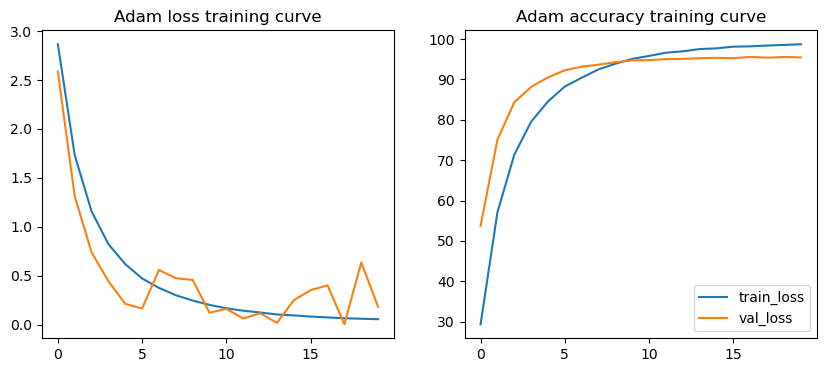

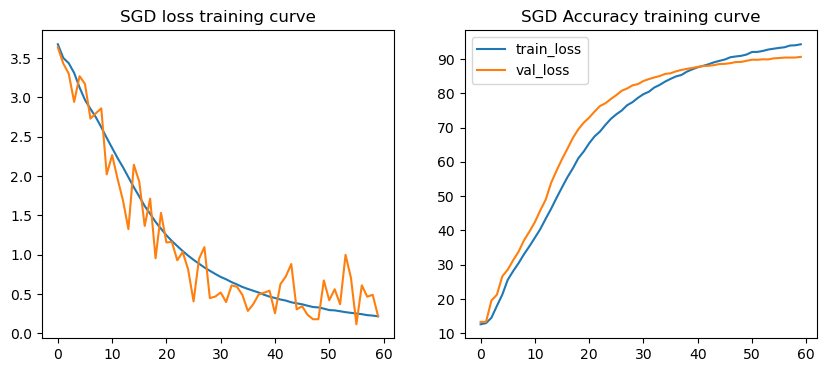

In [29]:
from matplotlib import pyplot as plt
# adam_training_losses,adam_training_acc,adam_val_losses,adam_val_acc
# Plotting of Adam training results
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Adam loss training curve") 
plt.plot(adam_training_losses, label='train_loss')
plt.plot(adam_val_losses,label='val_loss')

plt.subplot(1,2,2)
plt.title("Adam accuracy training curve") 
plt.plot(adam_training_acc, label='train_loss')
plt.plot(adam_val_acc,label='val_loss')

plt.legend()
plt.show()

# Plotting of SGD training results
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("SGD loss training curve") 
plt.plot(SGD_training_losses, label='train_loss')
plt.plot(SGD_val_losses,label='val_loss')

plt.subplot(1,2,2)
plt.title("SGD Accuracy training curve") 
plt.plot(SGD_training_acc, label='train_loss')
plt.plot(SGD_val_acc,label='val_loss')

plt.legend()
plt.show()

### Testing Model with Adam Optimizer

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

x_test = torch.Tensor(x_test).to(device)
outputs = adam_model(x_test)
_, pred = torch.max(outputs,1)
pred = pred.to('cpu')
mat= confusion_matrix(y_test,pred)


<Axes: >

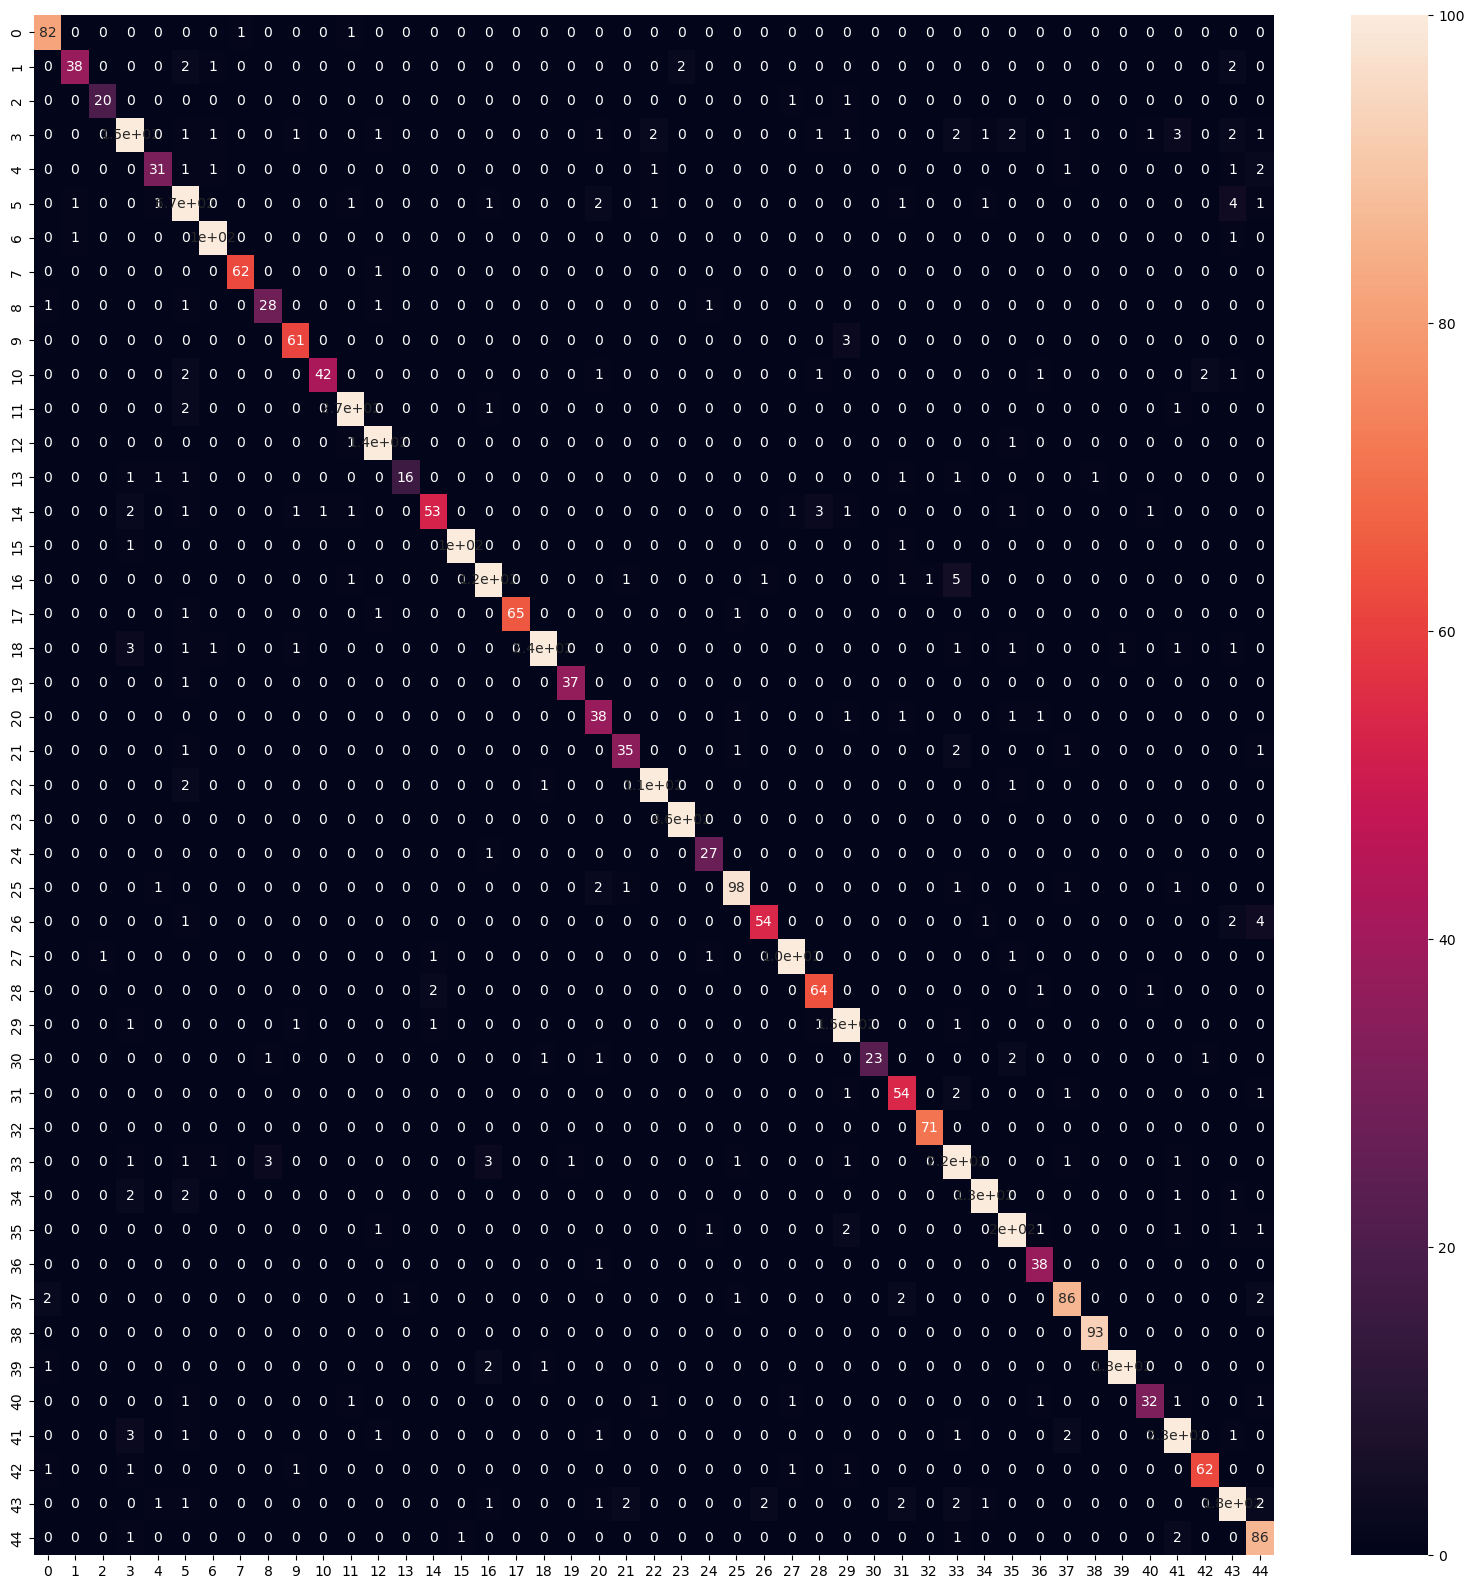

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(mat, annot= True,vmax=100)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96        84
           1       0.95      0.84      0.89        45
           2       0.95      0.91      0.93        22
           3       0.90      0.87      0.88       168
           4       0.89      0.82      0.85        38
           5       0.97      0.98      0.97       685
           6       0.95      0.98      0.97       106
           7       0.98      0.98      0.98        63
           8       0.88      0.88      0.88        32
           9       0.92      0.95      0.94        64
          10       0.98      0.84      0.90        50
          11       0.98      0.99      0.98       273
          12       0.96      0.99      0.97       146
          13       0.94      0.73      0.82        22
          14       0.93      0.80      0.86        66
          15       0.99      0.98      0.99       104
          16       0.93      0.93      0.93       135
          17       1.00    